# Test delle Ipotesi Parte 2 (F-test, Wald-test, t-test)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [40]:
golf = pd.read_stata('../Data/golf.dta')
golf.head()

,price,age,kilometer,TIA,extras1,extras2
0,7.30,73.0,10.0,12.0,1.0,1.0
1,3.85,115.0,30.0,20.0,1.0,0.0
2,2.95,127.0,43.0,6.0,0.0,1.0
3,4.80,104.0,54.0,25.0,1.0,1.0
4,6.20,86.0,57.0,23.0,0.0,0.0


<AxesSubplot: xlabel='TIA', ylabel='price'>

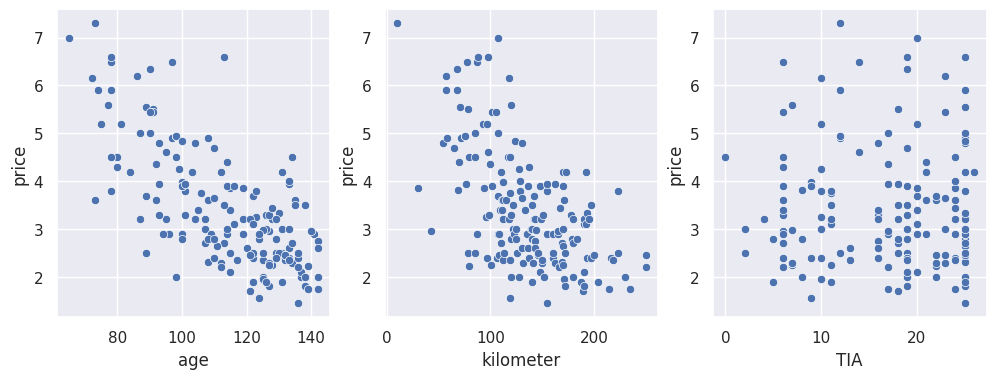

In [39]:
sns.set()
fig, axes = plt.subplots(1, 3, figsize= (12, 4))

sns.scatterplot(data = golf, x = 'age',y='price',ax=axes[0])
sns.scatterplot(data = golf, x = 'kilometer',y='price',ax=axes[1])
sns.scatterplot(data = golf, x = 'TIA',y='price',ax=axes[2])

Text(0.5, 0, 'ABS yes / no')

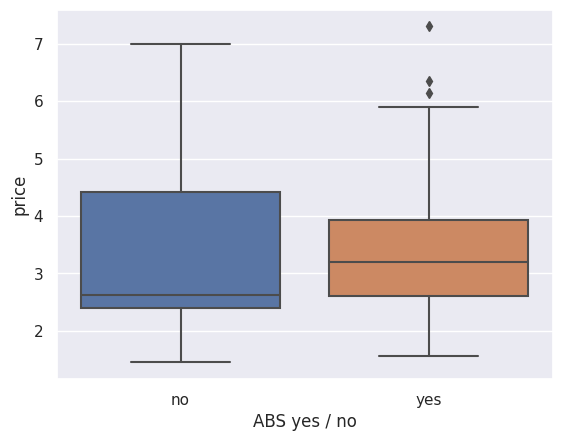

In [37]:
sns.boxplot(data = golf,x='extras1',y='price').set(xticklabels=["no","yes"])
plt.xlabel('ABS yes / no')


> Le auto senza ABS hanno una variabilità maggiore, forse dovuta alle auto d'epoca

Text(0.5, 0, 'Sunroof yes / no')

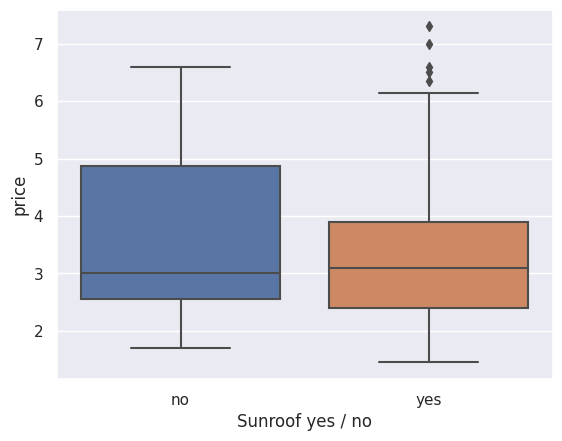

In [38]:
sns.boxplot(data = golf,x='extras2',y='price').set(xticklabels=["no","yes"])
plt.xlabel('Sunroof yes / no')

Per evitare problemi di correlazione tra variabili, creiamo polinomi ortogonali di `kilometer` e `age`.

In [61]:
model_list = list()
model_list.append(sm.OLS(golf['price'],sm.add_constant(golf[['age','kilometer','TIA','extras1','extras2']])).fit())
model_list.append(sm.OLS(golf['price'],sm.add_constant(golf[['age','kilometer','TIA','extras1']])).fit())
model_list.append(sm.OLS(golf['price'],sm.add_constant(golf[['age','kilometer','TIA']])).fit())
model_list.append(sm.OLS(golf['price'],sm.add_constant(golf[['age','kilometer']])).fit())

print(min(model_list, key=lambda x: x.aic).summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     135.0
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           9.20e-36
Time:                        15:57:38   Log-Likelihood:                -199.30
No. Observations:                 172   AIC:                             404.6
Df Residuals:                     169   BIC:                             414.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0026      0.362     24.879      0.0